<a href="https://colab.research.google.com/github/javedmatrah/AIQ2/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.4.1 The IMDB dataset
Samples 50,000 review samples<br>
25,000 for training and 25,000 for testing. <br>
50% Negative and 50% positive  Reviews<br>
Available in Kears pre data sets pre converted in Vector numbers where each number replace spacifice word.<br>
80 Mb data size download when you first run otherwise you can see this data set file in .keras folder
#Listing 3.1 Loading the IMDB dataset




In [29]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [30]:
print("X:  ",len(train_data[0]))
print("X:  ",train_data[0])

print("Y:  ",train_labels[0])

X:   218
X:   [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Y:   1


In [31]:
print("X:  ",len(train_data[1]))

X:   189


In [32]:
max([max(sequence) for sequence in train_data])

9999

In [33]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])


decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
                        #   1-3
                        #   -2

In [34]:
reverse_word_index.get(100, '?')

'after'

In [35]:
#word_index

In [36]:
#reverse_word_index

In [37]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#3.4.2 Preparing the data
Each sample length are differents but our network accept spacific shape size tensor we have to convert each sample into equal size of tensor apply vectorization technics like one-hot-encodev

#Listing 3.2 Encoding the integer sequences into a binary matrix

In [38]:
#train_data[0]

In [39]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [40]:
print(x_train[0])
print(len(x_train[0]))

[0. 1. 1. ... 0. 0. 0.]
10000


#You should also vectorize your labels, which is straightforward:

In [41]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train[0]

1.0

#3.4.3 Building your network
##Listing 3.3 The model definition

In [42]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#compilation step
Loss function (binary_crossentropy,mean_squared_error) but binary_crossentropy is best
##Listing 3.4 Compiling the modelv

In [43]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#3.4.4 Validating your approach

In [44]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [45]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Listing 3.8 Training your model

In [48]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
118/118 [==============================] - 2s 15ms/step - loss: 0.3997 - accuracy: 0.8335 - val_loss: 0.3328 - val_accuracy: 0.8648
Epoch 2/20
118/118 [==============================] - 1s 12ms/step - loss: 0.2152 - accuracy: 0.9214 - val_loss: 0.2717 - val_accuracy: 0.8907
Epoch 3/20
118/118 [==============================] - 1s 12ms/step - loss: 0.1561 - accuracy: 0.9435 - val_loss: 0.3087 - val_accuracy: 0.8813
Epoch 4/20
118/118 [==============================] - 1s 13ms/step - loss: 0.1194 - accuracy: 0.9575 - val_loss: 0.3978 - val_accuracy: 0.8670
Epoch 5/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0891 - accuracy: 0.9693 - val_loss: 0.3624 - val_accuracy: 0.8807
Epoch 6/20
118/118 [==============================] - 2s 13ms/step - loss: 0.0649 - accuracy: 0.9783 - val_loss: 0.4237 - val_accuracy: 0.8749
Epoch 7/20
118/118 [==============================] - 2s 15ms/step - loss: 0.0449 - accuracy: 0.9868 - val_loss: 0.4783 - val_accuracy: 0.8715

In [49]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#Listing 3.9 Plotting the training and validation loss

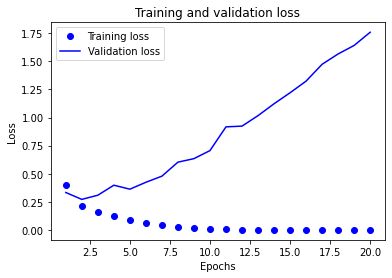

In [51]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = np.arange(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Listing 3.10 Plotting the training and validation accuracy

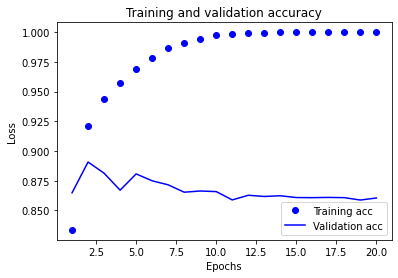

In [55]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Listing 3.11 Retraining a model from scratch

In [23]:
# model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=4, batch_size=512)
# results = model.evaluate(x_test, y_test)

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='tanh'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.1716 - accuracy: 0.7670
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0959 - accuracy: 0.8922
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0725 - accuracy: 0.9222
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.0916 - accuracy: 0.8799


In [25]:
results

[0.0882277712225914, 0.8799200057983398]

This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, you should be able to get close to 95%.

#3.4.5 Using a trained network to generate predictions on new data

In [ ]:
model.predict(x_test)

array([[0.20866603],
       [0.9994003 ],
       [0.71321034],
       ...,
       [0.09015474],
       [0.07647404],
       [0.44027507]], dtype=float32)

#3.4.6 Further experiments
The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:

You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
Try using the mse loss function instead of binary_crossentropy.
Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.